## Semi-supervised Supplementary Figures

In this notebook, I will plot the validation results for each of the following semi-supervised models:

1. 2.2 chemistry
2. 3.2 chemistry
3. Revio

In [1]:
# Import needed libraries

import numpy as np
import configparser
import matplotlib.pyplot as plt

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

### Plots for 2.2, 3.2 and Revio chemistry semi-supervised model

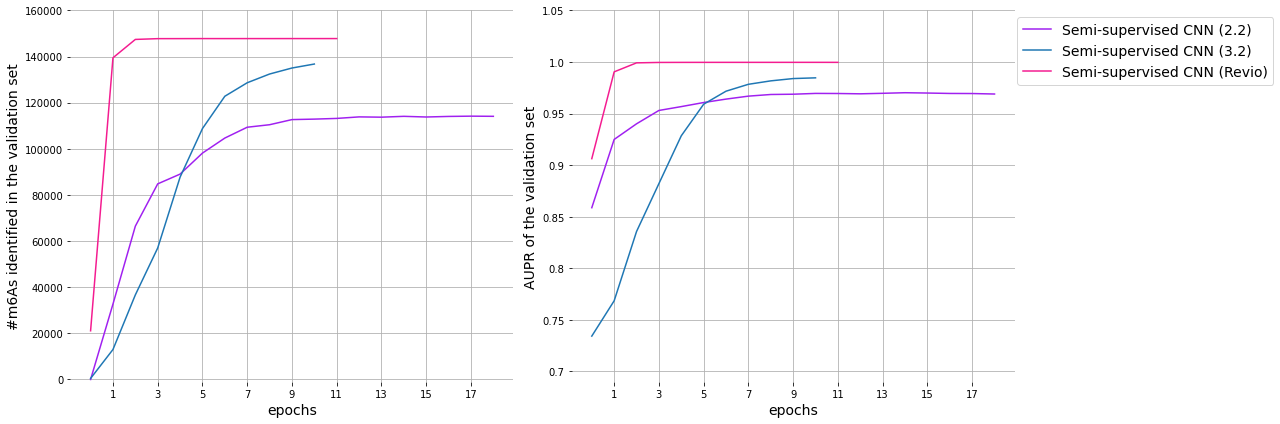

In [2]:
semi_model_2_2_path = "data/inter_data/val_pos_identified_2.2.npz"
semi_model_3_2_path = "data/inter_data/val_pos_identified_PS00243_mrv.npz"
semi_model_revio_path = "data/inter_data/val_pos_identified_Revio_GM12878_244_ec_6.npz"


semi_model_2_2 = np.load(semi_model_2_2_path)
semi_model_3_2 = np.load(semi_model_3_2_path)
semi_model_revio = np.load(semi_model_revio_path)

num_pos_2_2 = semi_model_2_2['num_pos'] 
num_pos_3_2 = semi_model_3_2['num_pos']
num_pos_revio = semi_model_revio['num_pos'] 

val_ap_2_2 = semi_model_2_2['val_ap']  
val_ap_3_2 = semi_model_3_2['val_ap'] 
val_ap_revio = semi_model_revio['val_ap'] 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

x_2_2 = np.arange(0, len(num_pos_2_2))
ax[0].plot(x_2_2, num_pos_2_2, c="#A020F0", label="Semi-supervised CNN (2.2)")

x_3_2 = np.arange(0, len(num_pos_3_2))
ax[0].plot(x_3_2, num_pos_3_2, label="Semi-supervised CNN (3.2)")

x_revio = np.arange(0, len(num_pos_revio))
ax[0].plot(x_revio, num_pos_revio, c="#F41C90", label="Semi-supervised CNN (Revio)")

ax[0].set_xticks([1, 3, 5, 7, 9, 11, 13, 15, 17])
ax[0].set_xticklabels([1, 3, 5, 7, 9, 11, 13, 15, 17])

ax[0].set_ylim([-1000, 160000])
ax[0].set_yticks([0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000])
ax[0].set_yticklabels([0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000])


ax[0].set_xlabel("epochs", fontsize=14)
ax[0].set_ylabel("#m6As identified in the validation set", fontsize=14)

simpleaxis(ax[0])
ax[0].grid(True)

ax[1].plot(x_2_2, val_ap_2_2, c="#A020F0", label="Semi-supervised CNN (2.2)")
ax[1].plot(x_3_2, val_ap_3_2, label="Semi-supervised CNN (3.2)")
ax[1].plot(x_revio, val_ap_revio, c="#F41C90", label="Semi-supervised CNN (Revio)")

ax[1].set_xticks([1, 3, 5, 7, 9, 11, 13, 15, 17])
ax[1].set_xticklabels([1, 3, 5, 7, 9, 11, 13, 15, 17])

ax[1].set_ylim([0.69, 1.04])
ax[1].set_yticks([0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00, 1.05])
ax[1].set_yticklabels([0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00, 1.05])

ax[1].set_xlabel("epochs", fontsize=14)
ax[1].set_ylabel("AUPR of the validation set", fontsize=14)

simpleaxis(ax[1])

ax[1].grid(True)

plt.legend(bbox_to_anchor=(1.6, 1.0), fontsize=14)
plt.tight_layout()
plt.savefig("figures/sup_figure_semi_supervised.pdf", transparent=True)
plt.show()